## importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Data 

In [2]:
train = pd.read_csv("./train_ctrUa4K.csv")
train_original = train.copy()
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


## Univariate Analysis

### Target Variable

<AxesSubplot:>

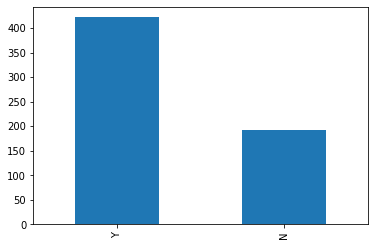

In [228]:
train['Loan_Status'].value_counts().plot.bar()

### Independent Variables

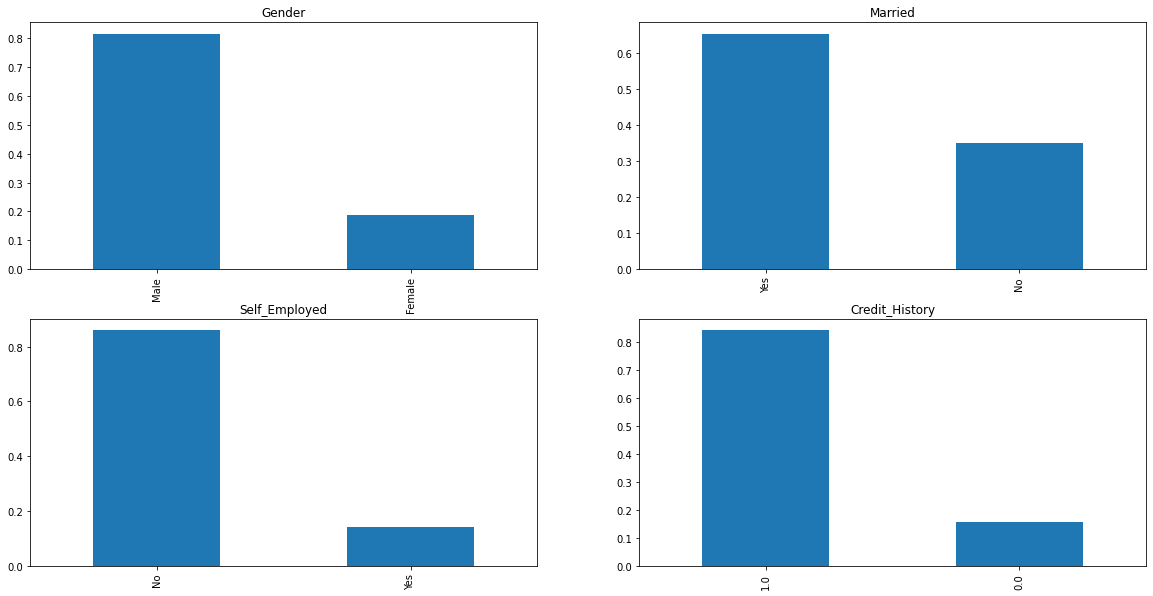

In [229]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

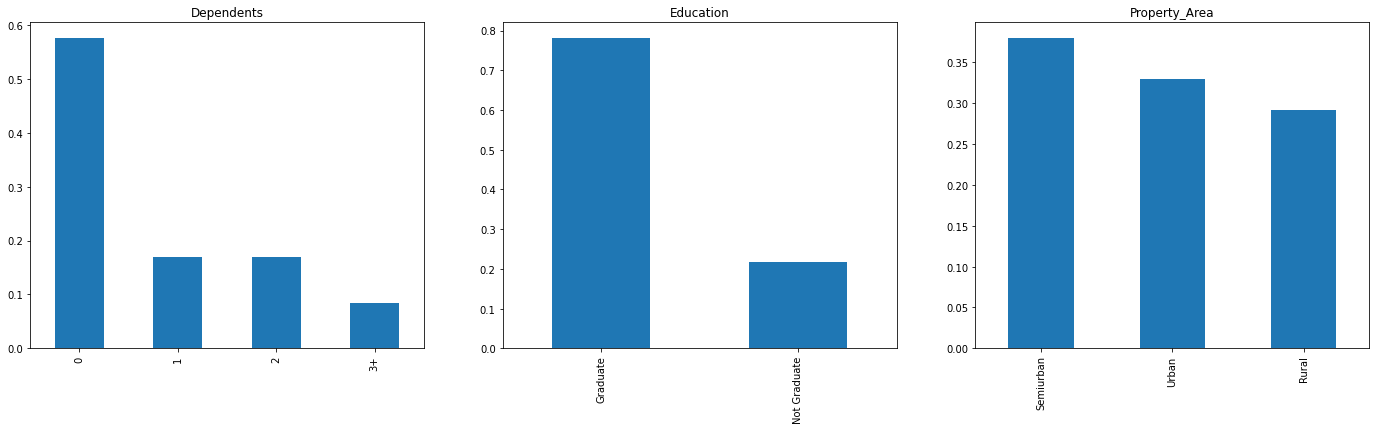

In [230]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

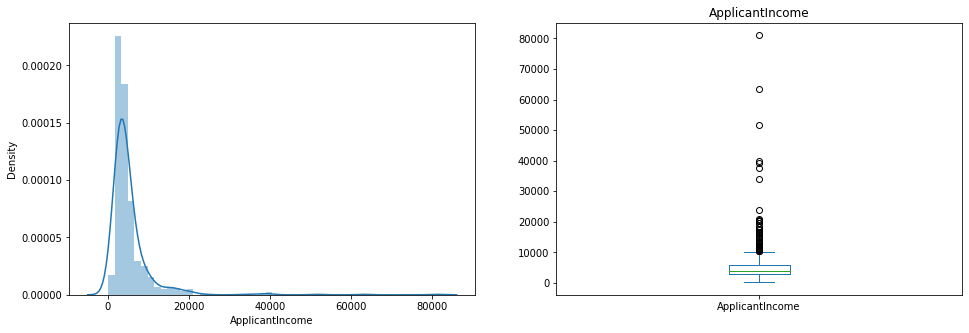

In [231]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5), title="ApplicantIncome")
plt.show()

### Outliers

Text(0.5, 0.98, '')

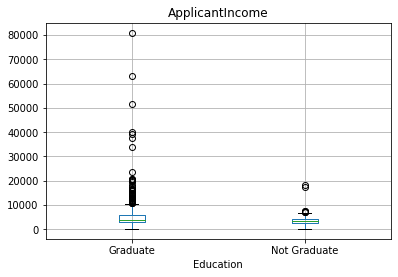

In [30]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.savefig('outlier.png', bbox_inches='tight')
plt.suptitle("")

Text(0.5, 0.98, '')

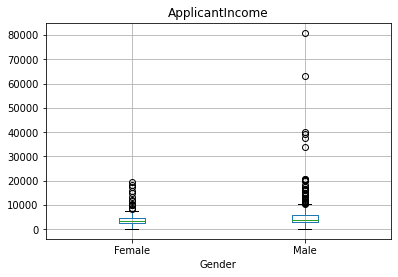

In [233]:
train.boxplot(column='ApplicantIncome', by='Gender')
plt.suptitle("")

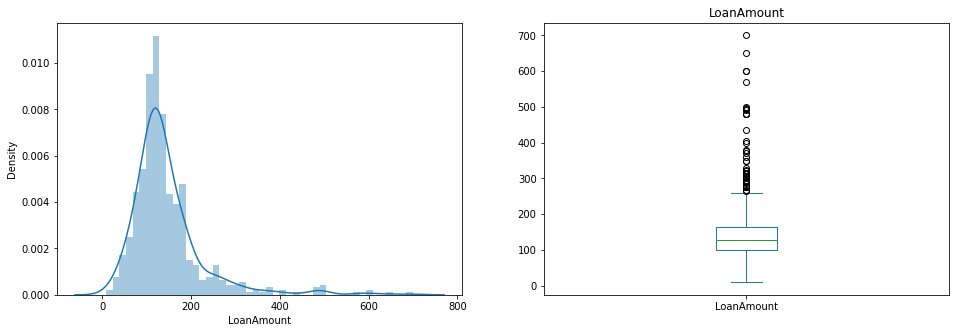

In [32]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5), title="LoanAmount")
plt.savefig('outlier_loanamount.png', bbox_inches='tight')
plt.show()

### Bivariate Analysis

#### Married people have reltively high chances of loan approval

<Figure size 432x288 with 0 Axes>

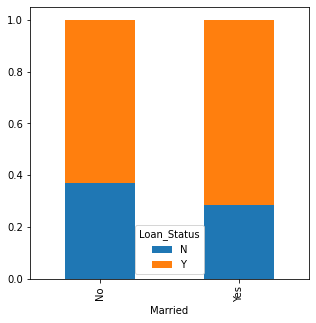

In [235]:
plt.figure(1)
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.show()

### Equal ratio for self-employed colums

<Figure size 432x288 with 0 Axes>

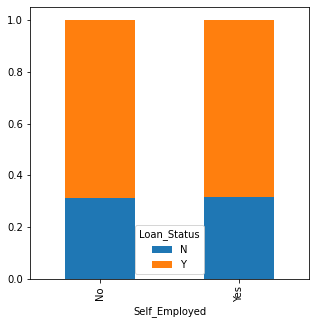

In [236]:
plt.figure(1)
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.show()

### People with 0 and 2 dependents have relatively higher chances of loan approval, however there isnt any significant difference when compared with other categories. 

<Figure size 432x288 with 0 Axes>

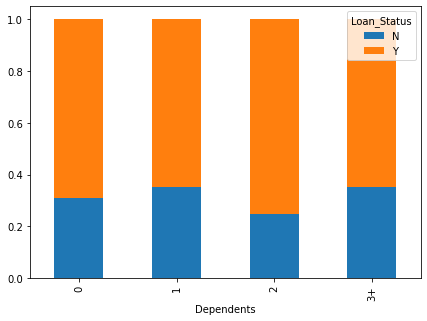

In [237]:
plt.figure(1)
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(7,5))
plt.show()

#### People with credit history as 1 are more likely to get their loans approved

<Figure size 432x288 with 0 Axes>

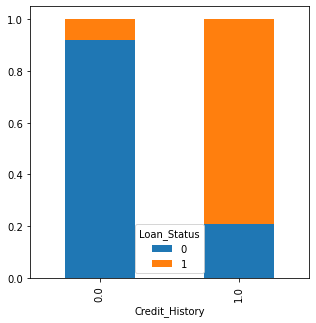

In [27]:
plt.figure(1)
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
plt.savefig('Credit_History_relevance.png', bbox_inches='tight')
plt.show()

## Visualizing correlated variables using Heat Map

### High correlation between (credit history, Loan status) and (Applicant Income, Loan amount)

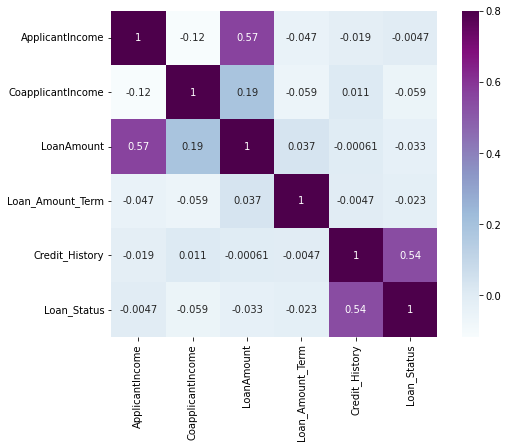

In [29]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", annot = True)
f.savefig('heatmap.png', bbox_inches='tight',dpi=300)

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Fill the Gender, Married, Dependents, Self_Employed, Credit_History using mode of the respective column, 

In [5]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [6]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### 360 is most repeated value in loan amount term, fill the N/A cells with mode

In [7]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

### We can fill self employed column with mode as the column has equal no of loan approvals

In [243]:
# train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

### As the loan_amount has some outliers, mean is not a feasible option, using median

In [9]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### We can drop credit_history column with missing values

In [10]:
train_new = train.copy()

 ### No Null value

In [11]:
train_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Loan amount has outliers as in the above box plots

### Use log to deal with outliers to supress high values

In [12]:
train_new['LoanAmount_Log'] = np.log(train_new['LoanAmount'])

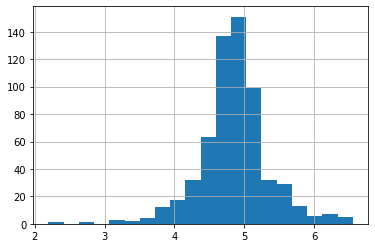

In [33]:
train_new['LoanAmount_Log'].hist(bins=20)
plt.savefig('histogram.png', bbox_inches='tight')

In [250]:
# train_new['Loan_Amount_Term_factor'] =train_new['Loan_Amount_Term'].div(60)

In [251]:
# train_new['ApplicantIncome_Log'] = np.log(train_new['ApplicantIncome'])
# train_new['CoapplicantIncome_Log'] = np.log(train_new['CoapplicantIncome'].replace(0, 1))

#### Delete the pre-transformed columns from train_new and create the y_new

In [14]:
# train_new = train_new.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

train_new = train_new.drop(['Loan_ID', "LoanAmount"], axis=1)
y_new=train_new['Loan_Status']

In [15]:
train_new = train_new.drop(['Loan_Status'], axis=1)
train_new.shape, y_new.shape

((614, 11), (614,))

In [34]:
y_new.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Transform the categorical values into numerical values

In [16]:
train_new=pd.get_dummies(train_new)

### Train the model using Logistic regression

In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# X_train, X_val, y_train, y_val = train_test_split(train_new, y_new, test_size=0.33, random_state=42)
# model = LogisticRegression().fit(X_train, y_train)

### Train the model using Decision Tree

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model_tree = tree.DecisionTreeClassifier(random_state=1)
X_train, X_val, y_train, y_val = train_test_split(train_new, y_new, test_size=0.33, random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [22]:
train_new

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,4.262680,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,180.0,1.0,3.688879,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,360.0,1.0,5.533389,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,360.0,1.0,5.231109,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [260]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# model_xgb = XGBClassifier(n_estimators=200, max_depth=8)
# X_train, X_val, y_train, y_val = train_test_split(train_new, y_new, test_size=0.33, random_state=42)
# model_xgb.fit(X_train, y_train)

In [20]:
predictions = model_tree.predict(X_val)
accuracy_score(y_val, predictions)

0.7093596059113301

In [21]:
import pickle
pkl_filename = "decisiontree_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_tree, file)